In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from wrangle import wrangle_zillow
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.preprocessing import QuantileTransformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle_zillow()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [ ]:
df

In [ ]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

In [ ]:
train.info()

## Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')


In [ ]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled 

In [ ]:
scaler2 = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler2.fit(x_train)

x_train_scaled = scaler2.transform(x_train)
x_validate_scaled = scaler2.transform(x_validate)
x_test_scaled = scaler2.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')


In [ ]:
scaler3 = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler3.fit(x_train)

x_train_scaled = scaler3.transform(x_train)
x_validate_scaled = scaler3.transform(x_validate)
x_test_scaled = scaler3.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')


## Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [ ]:
x_train_inverse = scaler.inverse_transform(x_train)

In [ ]:
x_train_inverse

#no it looks very diffrentn

## Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [ ]:
scaler4 = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler4.fit(x_train)

x_train_scaled = scaler4.transform(x_train)
x_validate_scaled = scaler4.transform(x_validate)
x_test_scaled = scaler4.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')


## Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [ ]:
scaler4 = sklearn.preprocessing.QuantileTransformer()
scaler4.fit(x_train)

x_train_scaled = scaler4.transform(x_train)
x_validate_scaled = scaler4.transform(x_validate)
x_test_scaled = scaler4.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

# EXPLORATION

In [4]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094583 entries, 0 to 2094582
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             int64  
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(2), int64(5)
memory usage: 127.8 MB


In [6]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [7]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------")

bedroomcnt
3    955909
4    621076
2    332538
5    138255
1     22724
6     19800
0      4281
Name: bedroomcnt, dtype: int64
-----------------
bathroomcnt
2.00    940253
3.00    416455
1.00    412088
2.50    142178
4.00     74214
1.50     31112
3.50     26778
5.00     20923
4.50     16820
6.00      5412
0.00      4183
5.50      4151
0.50        13
1.75         3
Name: bathroomcnt, dtype: int64
-----------------
calculatedfinishedsquarefeet
1200    5182
1080    4372
1120    4350
1400    3822
1440    3681
        ... 
7452       1
7553       1
6539       1
7582       1
7026       1
Name: calculatedfinishedsquarefeet, Length: 7156, dtype: int64
-----------------
taxvaluedollarcnt
450000     820
500000     772
400000     722
430000     689
440000     682
          ... 
631975       1
557761       1
900571       1
1285615      1
536061       1
Name: taxvaluedollarcnt, Length: 557433, dtype: int64
-----------------
yearbuilt
1955    83829
1950    70957
1954    68597
1953    61835
1956    61

bedroomcnt


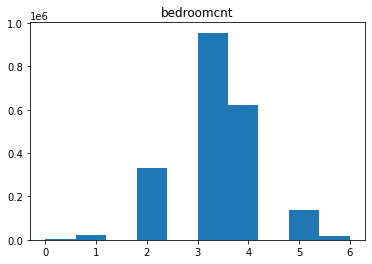

bathroomcnt


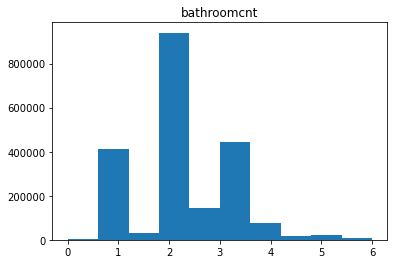

calculatedfinishedsquarefeet


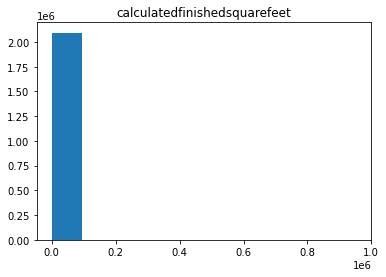

taxvaluedollarcnt


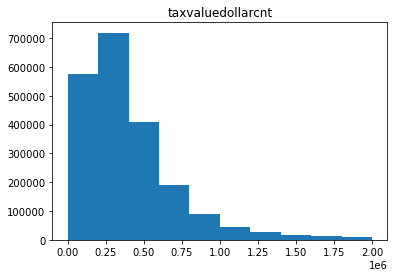

yearbuilt


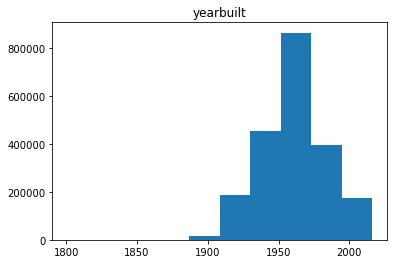

taxamount


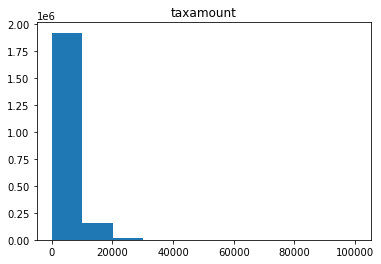

fips


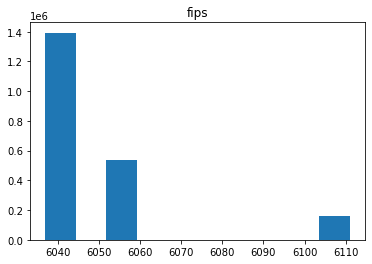

In [8]:
for col in df.columns:
    print(col)
    plt.title(col)
    df[col].hist()
    plt.grid(False)
    plt.show()

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2094583.0,3.270296,0.890566,0.00,3.00,3.00,4.000,6.00
bathroomcnt,2094583.0,2.181948,0.875982,0.00,2.00,2.00,3.000,6.00
calculatedfinishedsquarefeet,2094583.0,1797.675028,1091.113807,1.00,1250.00,1607.00,2159.000,952576.00
taxvaluedollarcnt,2094583.0,398621.437337,313506.822245,22.00,185937.00,322168.00,516761.000,1999995.00
yearbuilt,2094583.0,1960.662385,21.863628,1801.00,1949.00,1958.00,1975.000,2016.00
taxamount,2094583.0,4909.511134,3639.889997,6.34,2506.65,4040.15,6210.645,100379.34
fips,2094583.0,6048.373620,20.432690,6037.00,6037.00,6037.00,6059.000,6111.00


In [12]:
train.fips.value_counts()

6037    780350
6059    302501
6111     90115
Name: fips, dtype: int64

In [13]:
train.bedroomcnt.value_counts()

3    536017
4    347617
2    185651
5     77357
1     12726
6     11176
0      2422
Name: bedroomcnt, dtype: int64

In [14]:
train.bathroomcnt.value_counts()

2.00    526811
3.00    233221
1.00    230405
2.50     79651
4.00     41673
1.50     17419
3.50     14909
5.00     11602
4.50      9532
6.00      3073
0.00      2357
5.50      2301
0.50         9
1.75         3
Name: bathroomcnt, dtype: int64

In [16]:
train.yearbuilt.value_counts()

1955    46879
1950    39622
1954    38361
1953    34599
1956    34439
        ...  
1807        1
1878        1
1840        1
1876        1
1865        1
Name: yearbuilt, Length: 149, dtype: int64

Main takeaways-
 - large ammount of houses have about 3-4 bedrooms 
 - Bathroom mjority of houses have two 
 - majority sqarefoot have 1797.68 sqarefeet 
 - majority of houses are in between 0 and 200,000
 -  thses are all seperated by three area codes which is the fips

Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable. 
- did this earlier 

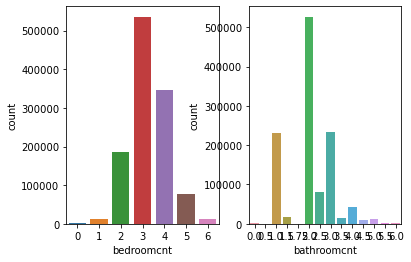

In [10]:
#this is used with the train dataset
fig, ax =plt.subplots(1,2)
sns.countplot(train['bedroomcnt'], ax=ax[0])
sns.countplot(train['bathroomcnt'], ax=ax[1])
fig.show()

Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

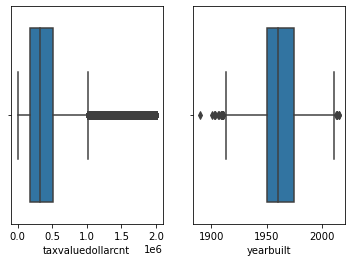

In [11]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x=train["taxvaluedollarcnt"], ax=ax[0])
sns.boxplot(train.sample(1000)['yearbuilt'], ax=ax[1])

fig.show()

Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

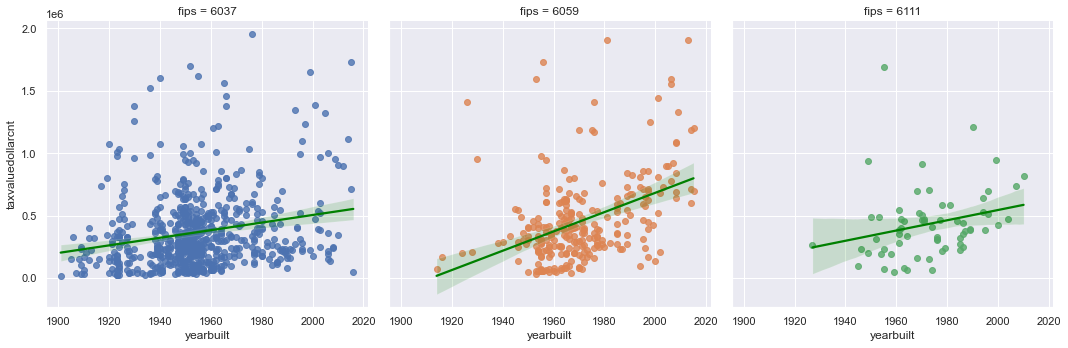

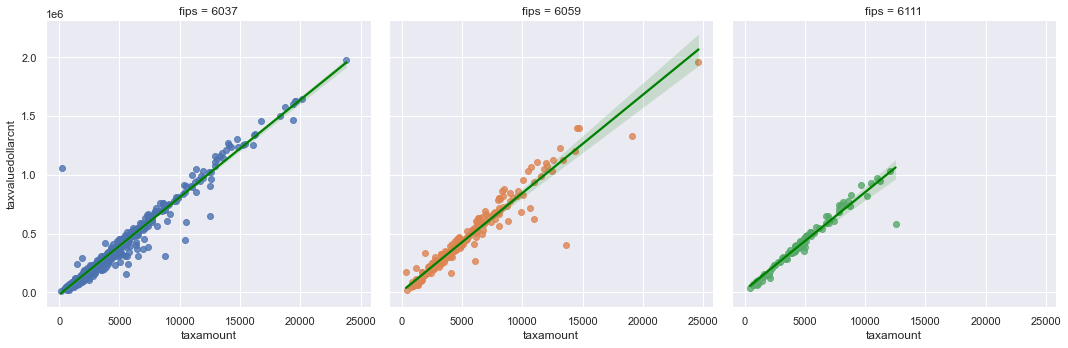

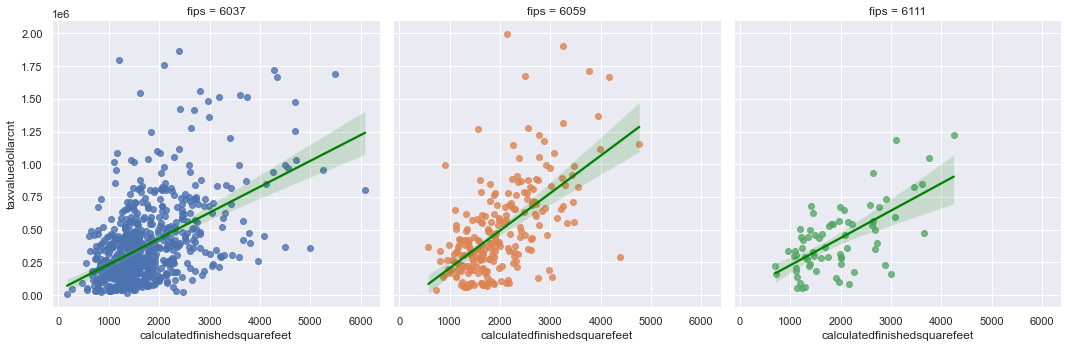

In [68]:
def plot_variable_pairs():
    columns = ['yearbuilt', 'taxamount','calculatedfinishedsquarefeet']
    for col in columns:
        sns.lmplot(x= col, y="taxvaluedollarcnt", data=train.sample(1000), col = 'fips',hue = "fips", line_kws ={'color': 'green'})
plot_variable_pairs()

## Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172966 entries, 410426 to 1350688
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1172966 non-null  int64  
 1   bathroomcnt                   1172966 non-null  float64
 2   calculatedfinishedsquarefeet  1172966 non-null  int64  
 3   taxvaluedollarcnt             1172966 non-null  int64  
 4   yearbuilt                     1172966 non-null  int64  
 5   taxamount                     1172966 non-null  float64
 6   fips                          1172966 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 71.6 MB


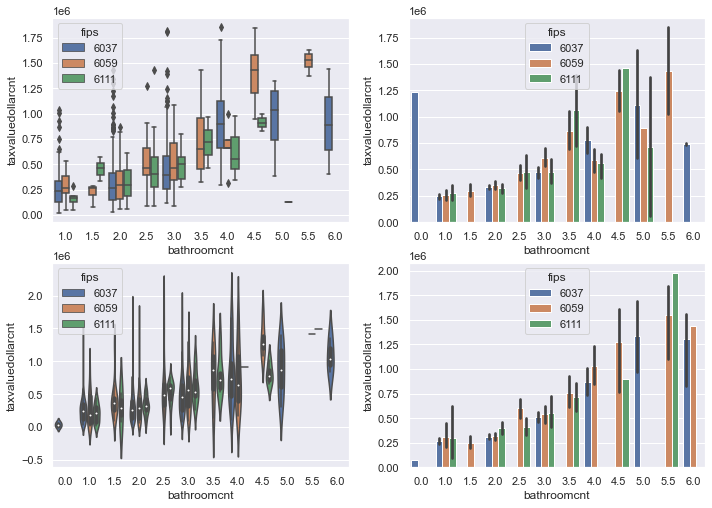

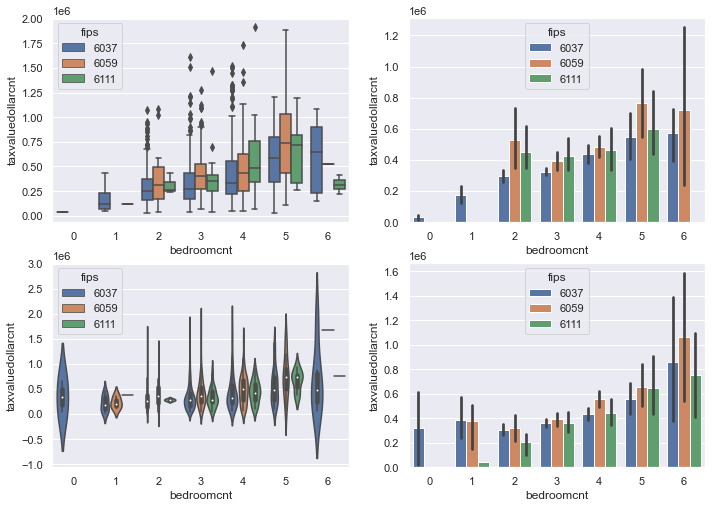

In [55]:
def plot_categorical_and_continuous_vars():
    columns = ['bathroomcnt','bedroomcnt']
    for x in columns:
        sns.set()
        fig, axes = plt.subplots(2,2)
        sns.boxplot(x= x, y="taxvaluedollarcnt", data=train.sample(1000), hue = 'fips', ax = axes[0,0])
        sns.barplot(x= x, y="taxvaluedollarcnt", data=train.sample(1000), hue = 'fips', ax = axes[0,1])
        sns.violinplot(x= x, y="taxvaluedollarcnt", data=train.sample(1000), hue = 'fips', ax = axes[1,0])
        sns.barplot(x= x, y="taxvaluedollarcnt", data=train.sample(1000), hue = 'fips', ax = axes[1,1])
        
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        
plot_categorical_and_continuous_vars()

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

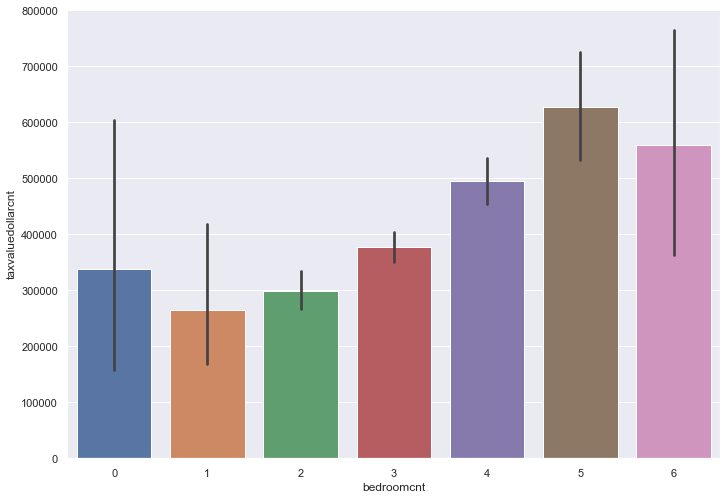

In [58]:
sns.barplot(x='bedroomcnt', y="taxvaluedollarcnt", data=train.sample(1000))

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

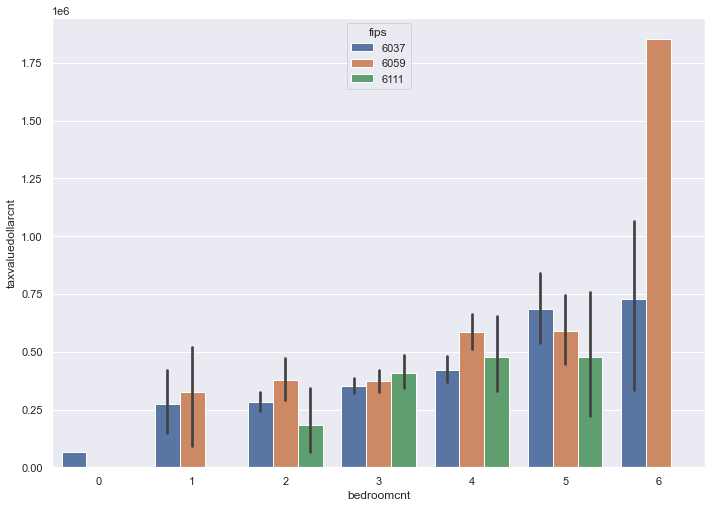

In [63]:
sns.barplot(x='bedroomcnt', y="taxvaluedollarcnt",hue = "fips", data=train.sample(1000))

In [ ]:
sns.lmplot(x= 'yearbuilt', y="taxvaluedollarcnt", data=train,hue = "fips", line_kws ={'color' : 'red'})

<AxesSubplot:xlabel='bathroomcnt', ylabel='taxvaluedollarcnt'>

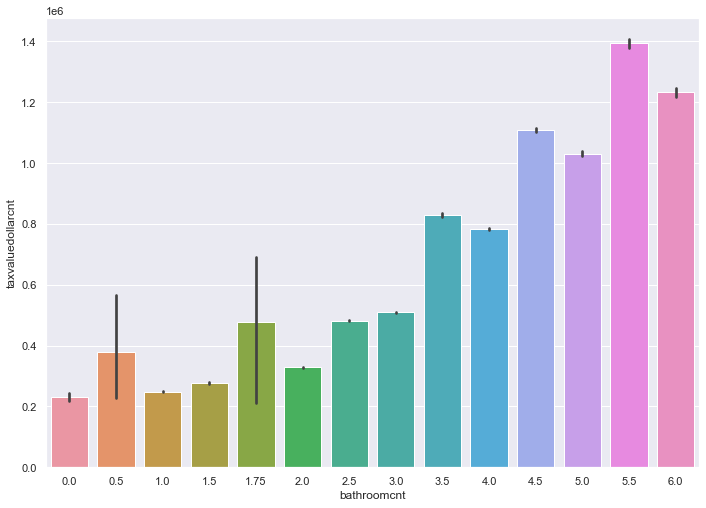

In [61]:
sns.barplot(x='bathroomcnt', y="taxvaluedollarcnt", data=train)

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.